In [1]:
import pandas as pd
import covid.util as util
import covid.jhu as jhu
import covid.covidtracking as covidtracking

import covid.states as states

import matplotlib.pyplot as plt


Bad key "nbagg.transparent" on line 426 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an update

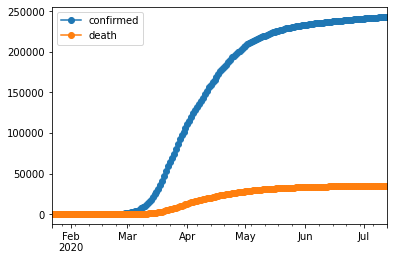

In [2]:
world = jhu.load_world()
world['Italy']['tot'].plot(style='-o')
plt.show()

In [3]:
county_data = util.load_county_data()


Index(['quantile', 'value', 'type', 'location', 'target', 'forecast_date',
       'target_end_date', 'key', 'UID', 'iso2', 'iso3', 'code3', 'Admin2',
       'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key',
       'Population', 'name', 'state'],
      dtype='object')


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


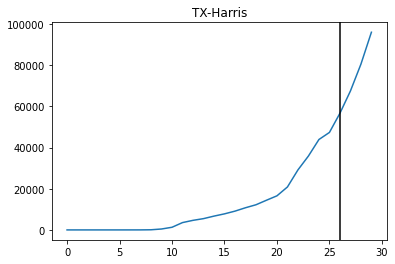

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


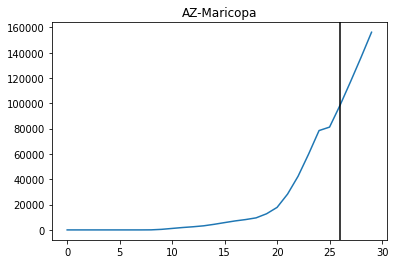

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


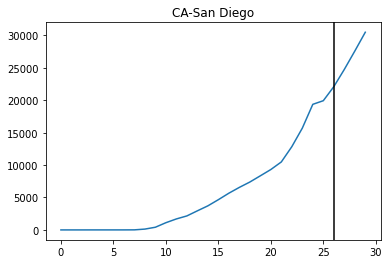

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


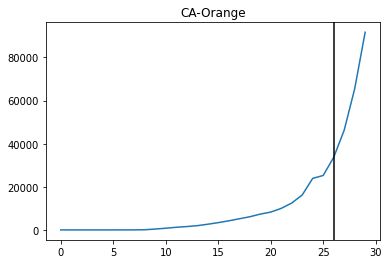

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


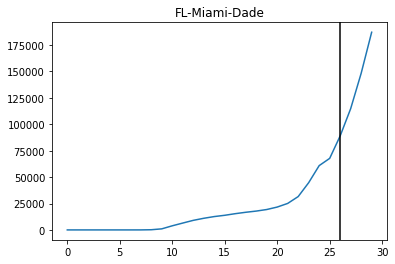

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


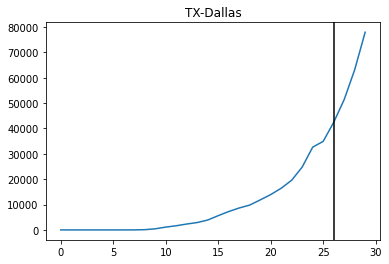

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


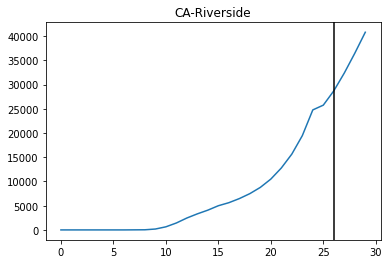

In [18]:
import numpy as np
sub = pd.read_csv("/Users/gcgibson/county_sub/county/2020-07-12-UMass-MechBayes.csv")

county_info = jhu.get_county_info().sort_values('Population',ascending=False)
county_info = county_info.reset_index()
county_info = county_info.set_index('FIPS')




sub = sub.join(county_info,on='location')
 
unique_locs = list(county_info.index)[3:10]
print (sub.columns)
#sub=sub.set_index('FIPS')
for place in unique_locs:
    place_name = sub[sub["location"] == place]['key'].values[0]
    fcast = sub[sub["location"] == place][sub["type"] == "point"].value.values
    tmp_df = county_data[place_name]['data']['confirmed']
    tmp_df = tmp_df.resample("1w",closed='left',label='left').last()
    #onfirmed = np.diff(.values)
    total = np.append(tmp_df.values,np.cumsum(fcast) +tmp_df.values[-1])
    #display(sub[sub["location"] == place][sub["type"] == "point"])
    plt.plot(total)
    plt.axvline(x=len(tmp_df.values),color='black')
    plt.title(place_name)
    plt.show()
    
